In [10]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import collections  as mc
import glob

In [9]:
def get_drumbeat_ticks_for_midi(midi_path):
    mf = m2.midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    ev = mf.tracks[0].events
    df = pd.DataFrame(data=[e.__dict__ for e in ev])
    df.insert(2,'type_str',df.type.map(lambda t: str(t).split('.')[-1]))
    df.insert(4,'time_abs',df.time.cumsum())

    all_events = {}
    open_events = {}
    for row in df[df.type_str.isin(['NOTE_ON','NOTE_OFF'])].itertuples():
        if row.type_str=='NOTE_ON':
            open_events[row.parameter1]=row.time_abs
        else:
            all_events[row.parameter1]=all_events.get(row.parameter1,[])+[(open_events[row.parameter1], row.time_abs)]


    return all_events

In [18]:
midi_files = glob.glob('../data/MIDI-Freestyle/Freestyle_*.mid')
group_number = lambda fname: int(fname.split('_')[1][:4])
file_list = sorted([file for file in midi_files if group_number(file) <= 1013 or group_number(file) >=1042])
file_list

['../data/MIDI-Freestyle/Freestyle_1001.mid',
 '../data/MIDI-Freestyle/Freestyle_1002.mid',
 '../data/MIDI-Freestyle/Freestyle_1003.mid',
 '../data/MIDI-Freestyle/Freestyle_1004.mid',
 '../data/MIDI-Freestyle/Freestyle_1005.mid',
 '../data/MIDI-Freestyle/Freestyle_1006.mid',
 '../data/MIDI-Freestyle/Freestyle_1007.mid',
 '../data/MIDI-Freestyle/Freestyle_1008.mid',
 '../data/MIDI-Freestyle/Freestyle_1009.mid',
 '../data/MIDI-Freestyle/Freestyle_1010.mid',
 '../data/MIDI-Freestyle/Freestyle_1011.mid',
 '../data/MIDI-Freestyle/Freestyle_1012.mid',
 '../data/MIDI-Freestyle/Freestyle_1013.mid',
 '../data/MIDI-Freestyle/Freestyle_1042.mid',
 '../data/MIDI-Freestyle/Freestyle_1043.mid',
 '../data/MIDI-Freestyle/Freestyle_1044.mid',
 '../data/MIDI-Freestyle/Freestyle_1045.mid',
 '../data/MIDI-Freestyle/Freestyle_1046.mid',
 '../data/MIDI-Freestyle/Freestyle_1047.mid',
 '../data/MIDI-Freestyle/Freestyle_1048.mid',
 '../data/MIDI-Freestyle/Freestyle_1049.mid',
 '../data/MIDI-Freestyle/Freestyle

In [26]:

all_events = { group_number(file): get_drumbeat_ticks_for_midi(file) for file in file_list}

event_counts = {g: {k: len(v) for k, v in lst.items()} for g,lst in all_events.items()}
    

In [27]:
event_counts

{1001: {43: 706, 45: 912, 48: 717},
 1002: {48: 590, 43: 600, 45: 561},
 1003: {45: 333, 48: 375, 43: 340},
 1004: {48: 778, 45: 857, 43: 498},
 1005: {45: 802, 48: 696, 43: 692},
 1006: {45: 390, 48: 215, 43: 153},
 1007: {48: 228, 45: 964, 43: 477},
 1008: {48: 822, 45: 929, 43: 643},
 1009: {43: 679, 45: 1023, 48: 573},
 1010: {45: 491, 43: 441, 48: 383},
 1011: {45: 556, 48: 392, 43: 431},
 1012: {45: 316, 48: 166, 43: 174},
 1013: {45: 543, 48: 586, 43: 642},
 1042: {45: 702, 48: 516, 43: 471},
 1043: {45: 662, 48: 638, 43: 473},
 1044: {45: 713, 48: 808, 43: 695},
 1045: {48: 643, 43: 665, 45: 664},
 1046: {48: 782, 45: 493, 43: 732},
 1047: {43: 597, 45: 622, 48: 398},
 1048: {45: 668, 43: 737, 48: 657},
 1049: {45: 389, 48: 198, 43: 293},
 1050: {48: 530, 43: 603, 45: 517},
 1051: {45: 676, 43: 705, 48: 598}}

In [51]:
event_counts_sorted = {g: np.array(sorted(lst.values())) for g, lst in event_counts.items()}
event_counts_sorted

event

{1001: array([706, 717, 912]),
 1002: array([561, 590, 600]),
 1003: array([333, 340, 375]),
 1004: array([498, 778, 857]),
 1005: array([692, 696, 802]),
 1006: array([153, 215, 390]),
 1007: array([228, 477, 964]),
 1008: array([643, 822, 929]),
 1009: array([ 573,  679, 1023]),
 1010: array([383, 441, 491]),
 1011: array([392, 431, 556]),
 1012: array([166, 174, 316]),
 1013: array([543, 586, 642]),
 1042: array([471, 516, 702]),
 1043: array([473, 638, 662]),
 1044: array([695, 713, 808]),
 1045: array([643, 664, 665]),
 1046: array([493, 732, 782]),
 1047: array([398, 597, 622]),
 1048: array([657, 668, 737]),
 1049: array([198, 293, 389]),
 1050: array([517, 530, 603]),
 1051: array([598, 676, 705])}

In [52]:
event_counts_diffs = {g : (np.diff(lst).min(), lst[2]-lst[0]) for g, lst in event_counts_sorted.items()}
event_ratios = {g : lst[1]/lst[0] for g, lst in event_counts_diffs.items()}

In [53]:
event_ratios

{1001: 18.727272727272727,
 1002: 3.9,
 1003: 6.0,
 1004: 4.544303797468355,
 1005: 27.5,
 1006: 3.8225806451612905,
 1007: 2.9558232931726907,
 1008: 2.6728971962616823,
 1009: 4.245283018867925,
 1010: 2.16,
 1011: 4.205128205128205,
 1012: 18.75,
 1013: 2.302325581395349,
 1042: 5.133333333333334,
 1043: 7.875,
 1044: 6.277777777777778,
 1045: 22.0,
 1046: 5.78,
 1047: 8.96,
 1048: 7.2727272727272725,
 1049: 2.0105263157894737,
 1050: 6.615384615384615,
 1051: 3.689655172413793}

In [54]:
event_counts_diffs

{1001: (11, 206),
 1002: (10, 39),
 1003: (7, 42),
 1004: (79, 359),
 1005: (4, 110),
 1006: (62, 237),
 1007: (249, 736),
 1008: (107, 286),
 1009: (106, 450),
 1010: (50, 108),
 1011: (39, 164),
 1012: (8, 150),
 1013: (43, 99),
 1042: (45, 231),
 1043: (24, 189),
 1044: (18, 113),
 1045: (1, 22),
 1046: (50, 289),
 1047: (25, 224),
 1048: (11, 80),
 1049: (95, 191),
 1050: (13, 86),
 1051: (29, 107)}

In [41]:
# [1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
 # 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051]
sg_rats_interaction = np.array([1.28589801, 1.08080804, 1.30721235, 1.25149081, 1.08867095,
       1.07652876, 1.19221213, 1.21842693, 1.03906657, 1.05316082,
       1.42415502, 1.41584971, 1.0520917 , 1.05667846, 1.09212165,
       1.14198762, 1.23782323, 1.28673302, 1.08631927, 1.1771771 ])

sg_rats_freestyle = np.array([ 1.458, -1.107, -0.064,  0.058, -1.006,  0.403,  2.329, -0.968, -0.233,  0.287,
  -1.683,  0.764, -0.558, -0.357, -1.035,  0.573, -0.99,   1.163, -0.194,  1.159])

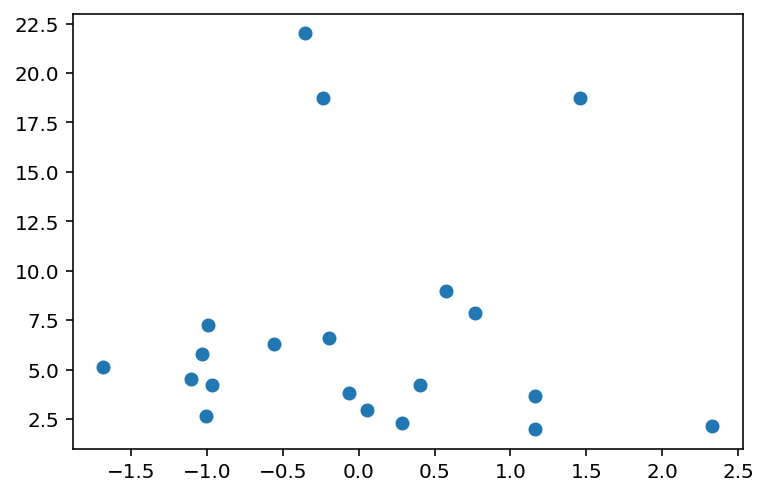

In [55]:
plt.scatter(sg_rats_freestyle,
            [
                event_ratios[k] 
                for k in  [1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                      1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051]
            ]
           )

In [111]:
axs.shape

(3, 2)

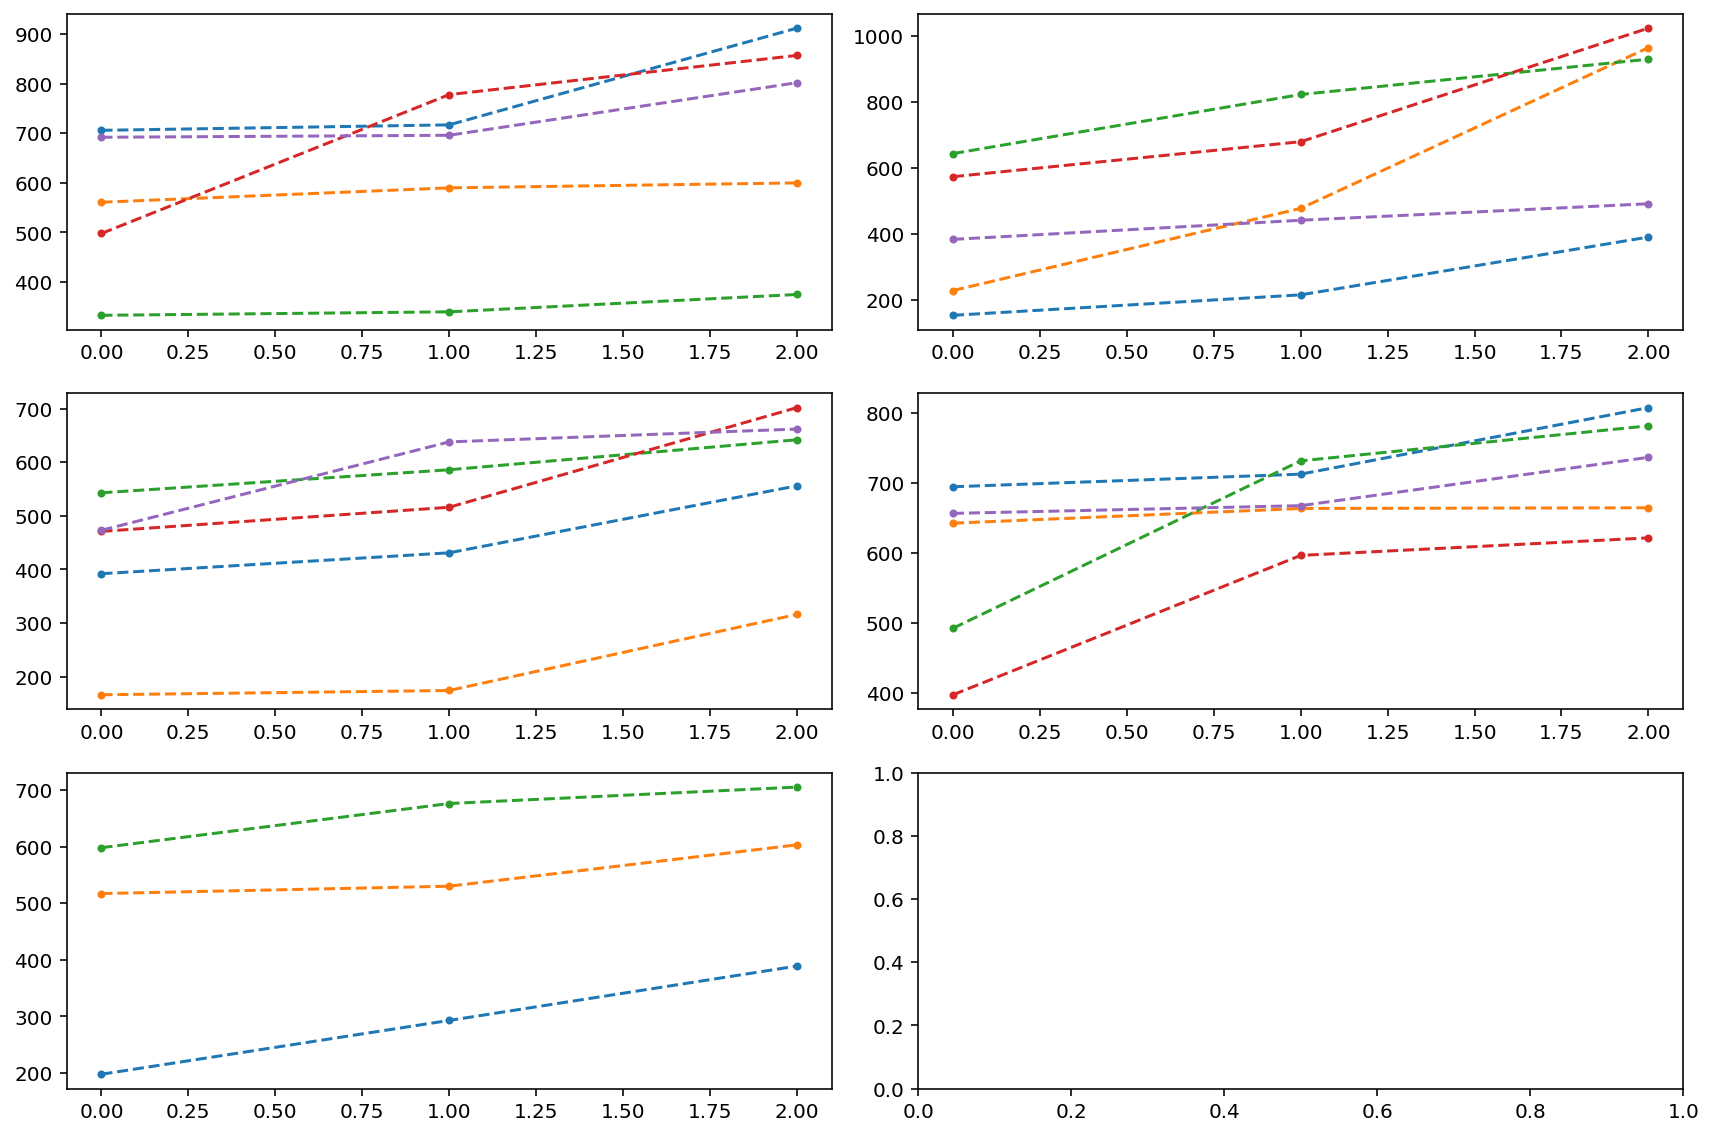

In [115]:
_, axs=plt.subplots(3,2,figsize=(12,8))
for i,v in enumerate(event_counts_sorted.values()):
    #plt.subplot(3,2,i//5+1)
    axs[i//10,(i//5)%2].plot(np.arange(3),v,'.--')
    
plt.tight_layout()
    

In [60]:
event_counts_arr = np.vstack(event_counts_sorted.values())
event_counts_arr

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([[ 706,  717,  912],
       [ 561,  590,  600],
       [ 333,  340,  375],
       [ 498,  778,  857],
       [ 692,  696,  802],
       [ 153,  215,  390],
       [ 228,  477,  964],
       [ 643,  822,  929],
       [ 573,  679, 1023],
       [ 383,  441,  491],
       [ 392,  431,  556],
       [ 166,  174,  316],
       [ 543,  586,  642],
       [ 471,  516,  702],
       [ 473,  638,  662],
       [ 695,  713,  808],
       [ 643,  664,  665],
       [ 493,  732,  782],
       [ 398,  597,  622],
       [ 657,  668,  737],
       [ 198,  293,  389],
       [ 517,  530,  603],
       [ 598,  676,  705]])

In [61]:
from scipy.stats import spearmanr

In [65]:
spearmanr(event_counts_arr)[1]

array([[7.46938006e-166, 2.82269487e-006, 8.50031969e-004],
       [2.82269487e-006, 0.00000000e+000, 2.15767121e-006],
       [8.50031969e-004, 2.15767121e-006, 0.00000000e+000]])

In [78]:
event_diff_arr = np.vstack([v for k, v in event_counts_diffs.items() if k != 1007])
event_diff_arr

array([[ 11, 206],
       [ 10,  39],
       [  7,  42],
       [ 79, 359],
       [  4, 110],
       [ 62, 237],
       [107, 286],
       [106, 450],
       [ 50, 108],
       [ 39, 164],
       [  8, 150],
       [ 43,  99],
       [ 45, 231],
       [ 24, 189],
       [ 18, 113],
       [  1,  22],
       [ 50, 289],
       [ 25, 224],
       [ 11,  80],
       [ 95, 191],
       [ 13,  86],
       [ 29, 107]])

In [67]:
spearmanr(event_counts_arr)

SpearmanrResult(correlation=array([[1.        , 0.80998273, 0.64689896],
       [0.80998273, 1.        , 0.81521739],
       [0.64689896, 0.81521739, 1.        ]]), pvalue=array([[7.46938006e-166, 2.82269487e-006, 8.50031969e-004],
       [2.82269487e-006, 0.00000000e+000, 2.15767121e-006],
       [8.50031969e-004, 2.15767121e-006, 0.00000000e+000]]))

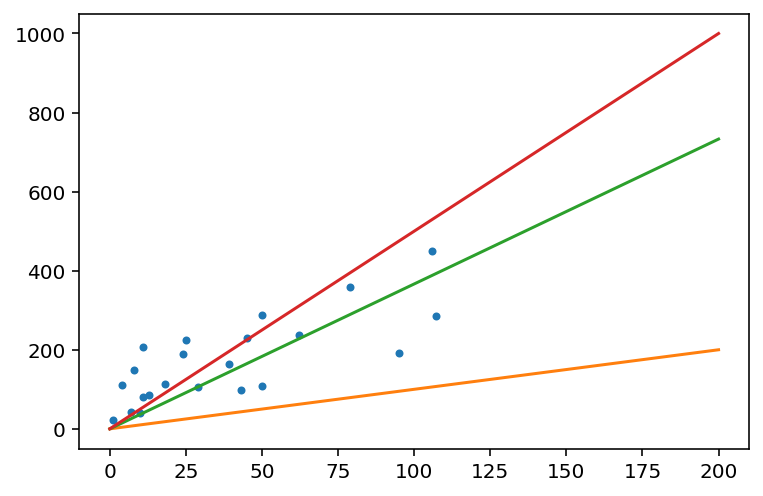

In [83]:
plt.plot(event_diff_arr[:,0],event_diff_arr[:,1],'.')
plt.plot([0,200],[0,200])
plt.plot([0,200],[0,200*3.6647])
plt.plot([0,200],[0,1000])

In [70]:

from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression(fit_intercept=False)
lr.fit(event_diff_arr[:,:1],event_diff_arr[:,1:])

LinearRegression(fit_intercept=False)

In [81]:
lr.coef_, lr.intercept_

(array([[3.66474627]]), 0.0)

In [88]:
event_ratios_arr = np.hstack([event_counts_arr[:,1:2]/ event_counts_arr[:,0:1],
                               event_counts_arr[:,2:3]/ event_counts_arr[:,1:2]])
event_ratios_arr

array([[1.01558074, 1.27196653],
       [1.0516934 , 1.01694915],
       [1.02102102, 1.10294118],
       [1.562249  , 1.10154242],
       [1.00578035, 1.15229885],
       [1.40522876, 1.81395349],
       [2.09210526, 2.02096436],
       [1.27838258, 1.13017032],
       [1.18499127, 1.50662739],
       [1.15143603, 1.11337868],
       [1.0994898 , 1.2900232 ],
       [1.04819277, 1.81609195],
       [1.07918969, 1.09556314],
       [1.0955414 , 1.36046512],
       [1.34883721, 1.03761755],
       [1.02589928, 1.13323983],
       [1.03265941, 1.00150602],
       [1.48478702, 1.06830601],
       [1.5       , 1.04187605],
       [1.01674277, 1.10329341],
       [1.47979798, 1.32764505],
       [1.02514507, 1.13773585],
       [1.13043478, 1.04289941]])

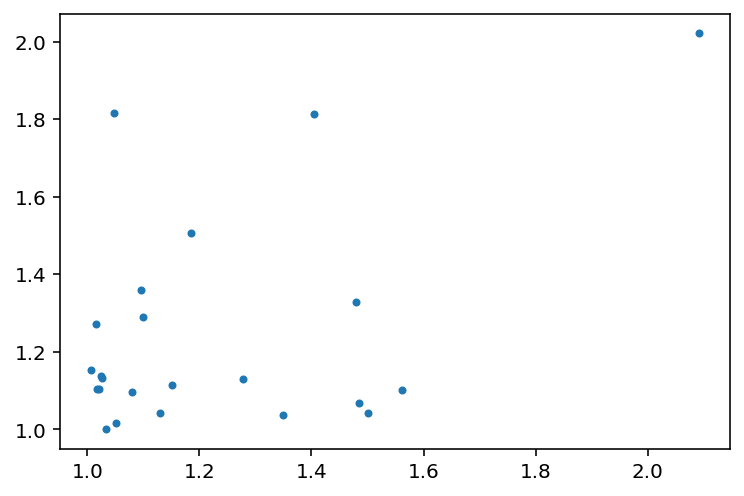

In [90]:
plt.plot(event_ratios_arr[:,0],event_ratios_arr[:,1],'.')

In [87]:
event_counts_arr[:,1:2]

array([[717],
       [590],
       [340],
       [778],
       [696],
       [215],
       [477],
       [822],
       [679],
       [441],
       [431],
       [174],
       [586],
       [516],
       [638],
       [713],
       [664],
       [732],
       [597],
       [668],
       [293],
       [530],
       [676]])

In [93]:
event_counts_arr

array([[ 706,  717,  912],
       [ 561,  590,  600],
       [ 333,  340,  375],
       [ 498,  778,  857],
       [ 692,  696,  802],
       [ 153,  215,  390],
       [ 228,  477,  964],
       [ 643,  822,  929],
       [ 573,  679, 1023],
       [ 383,  441,  491],
       [ 392,  431,  556],
       [ 166,  174,  316],
       [ 543,  586,  642],
       [ 471,  516,  702],
       [ 473,  638,  662],
       [ 695,  713,  808],
       [ 643,  664,  665],
       [ 493,  732,  782],
       [ 398,  597,  622],
       [ 657,  668,  737],
       [ 198,  293,  389],
       [ 517,  530,  603],
       [ 598,  676,  705]])

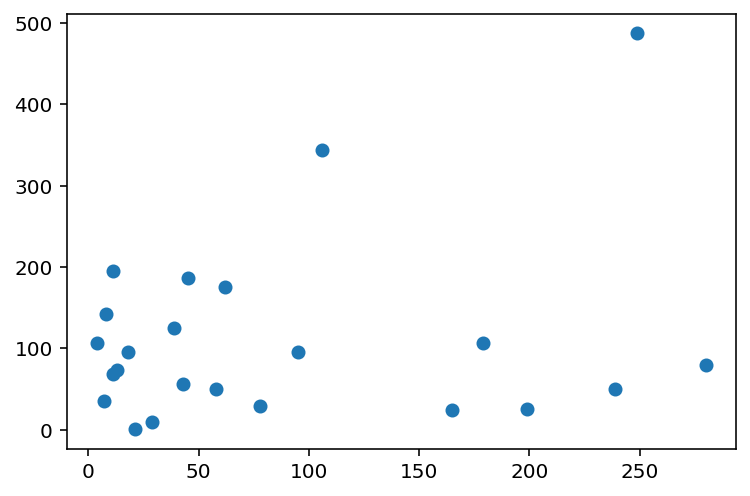

In [95]:
ecs = np.diff(event_counts_arr,axis=1)
plt.scatter(ecs[:,0],ecs[:,1])

## Synchrony dimensions
* does RMS, or a particular synchrony band, predict the outcome better than other types of synchrony?

## Relation between sessions
* what qualities of the groups are preserved between interaction and freestyle
* how does each type of synchrony develop in the four sessions

## synchrony and groups' internal structure
* can groups be divided into: tight group, one tight pair and one farther, loosely coupled? how is each group classified with respect to this internal structure and each synchrony band?

* does this structure predict any feature of the drumming outcome or the psych. outcome better than the average synchrony? 

* is the same structure (i.e. same distant participant) reflected in the responses/drumming synchrony?

## synchrony along time
* can synchrony in time be associated with specific events in the drumming?

## Drumming
* Do the three drummers, as a dynamical system, possess any interesting characteristics?

In [96]:
all_events[1007]

{48: [(1392, 1406),
  (1560, 1573),
  (1656, 1669),
  (1808, 1820),
  (1960, 1972),
  (2038, 2050),
  (2148, 2152),
  (2152, 2165),
  (2240, 2253),
  (2314, 2327),
  (2409, 2421),
  (2492, 2504),
  (2590, 2603),
  (2670, 2683),
  (2763, 2777),
  (2849, 2862),
  (3524, 3537),
  (3741, 3755),
  (4114, 4126),
  (4185, 4191),
  (4192, 4204),
  (4241, 4254),
  (4360, 4373),
  (4393, 4406),
  (4440, 4453),
  (4502, 4514),
  (4614, 4626),
  (4631, 4644),
  (4644, 4657),
  (4711, 4724),
  (4771, 4774),
  (4774, 4787),
  (4883, 4896),
  (4906, 4919),
  (4990, 5003),
  (5007, 5019),
  (5173, 5186),
  (5193, 5205),
  (5256, 5269),
  (5277, 5290),
  (5435, 5448),
  (5493, 5506),
  (5511, 5524),
  (6176, 6188),
  (6194, 6206),
  (6254, 6266),
  (6271, 6282),
  (6283, 6296),
  (6332, 6344),
  (6441, 6454),
  (6459, 6473),
  (6523, 6536),
  (6588, 6601),
  (6606, 6618),
  (6709, 6723),
  (6726, 6739),
  (6791, 6804),
  (6808, 6821),
  (6862, 6867),
  (6867, 6872),
  (6872, 6885),
  (6987, 7000),
  (7